# Problem 3

## Hierarchical Clustering: Linkages and Features

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#### Define Hierarchial Clustering Class. Generated using the scipy documentations and ChatGPT

In [2]:
class HierarchicalClustering:
    def __init__(self, data):
        self.data = data

    def compute_linkage(self, linkage_type):
        return linkage(self.data, linkage_type)

    def plot_dendrogram(self, linkage_matrix, title):
        plt.figure(figsize=(12, 6))
        dendrogram(linkage_matrix)
        plt.title(title)
        plt.xlabel("Data Points")
        plt.ylabel("Distance")
        plt.show()

### Dataset 1: Perform hierarchical clustering on the dataset and obtain the linkage matrix. Vary the linkages and features used and state your observations.Plot the dendogram using the linkage matrix.

In [27]:
data1 = pd.read_csv('SMAI-Dataset-hc-dataset/new_customers.csv')
encoder = LabelEncoder()
data1['Genre_encoded'] = encoder.fit_transform(data1['Genre'])
new_data1 = data1.drop("Genre", axis=1)
new_data1

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_encoded  
0                1  
1                1  
2                0  
3                0  
4                0  
..             ...  
195              0  
196              0  
197              1  
198              1  
199              1  

[200 rows x 5 columns]

In [37]:
#Linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Feature Combinations
new_data11 = new_data1.drop("Genre_encoded", axis=1)
new_data11 = new_data11.drop("CustomerID", axis=1)
new_data12 = new_data11.drop("Age", axis=1)

combination_of_features = [new_data11, new_data12, new_data1]
combination_of_features

[     Age  Annual Income (k$)  Spending Score (1-100)
 0     19                  15                      39
 1     21                  15                      81
 2     20                  16                       6
 3     23                  16                      77
 4     31                  17                      40
 ..   ...                 ...                     ...
 195   35                 120                      79
 196   45                 126                      28
 197   32                 126                      74
 198   32                 137                      18
 199   30                 137                      83
 
 [200 rows x 3 columns],
      Annual Income (k$)  Spending Score (1-100)
 0                    15                      39
 1                    15                      81
 2                    16                       6
 3                    16                      77
 4                    17                      40
 ..                  ...       

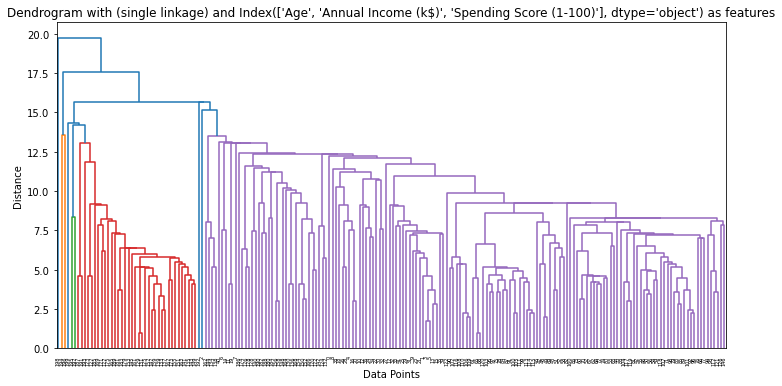

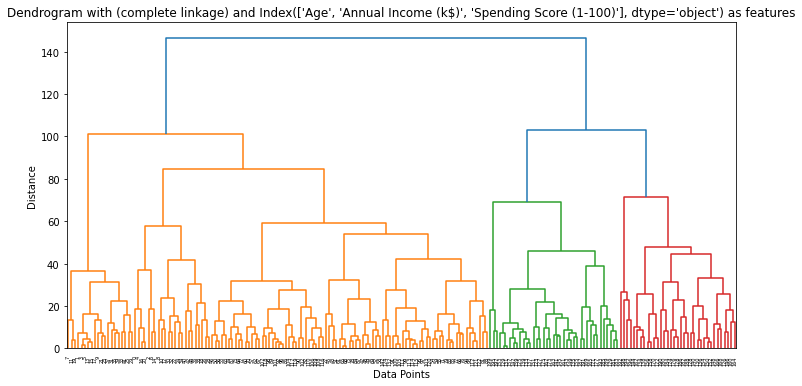

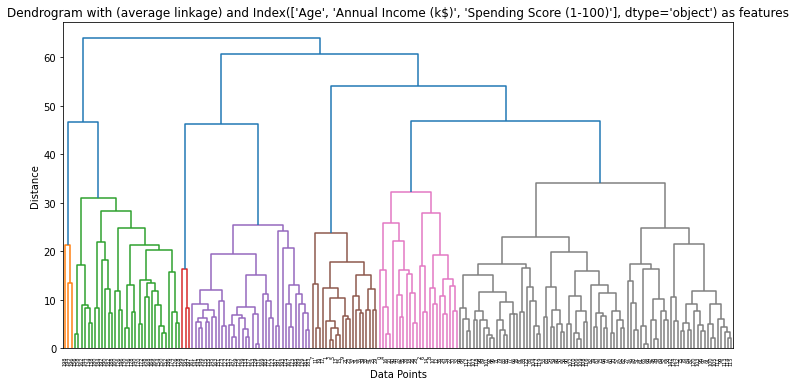

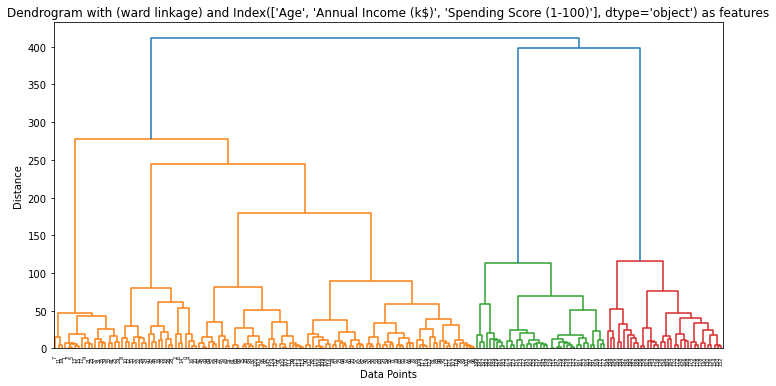

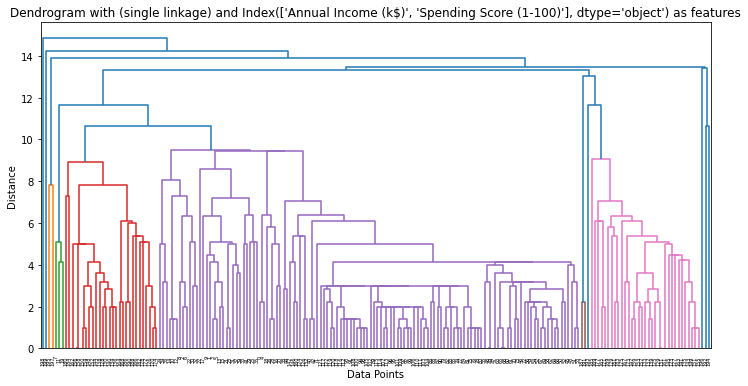

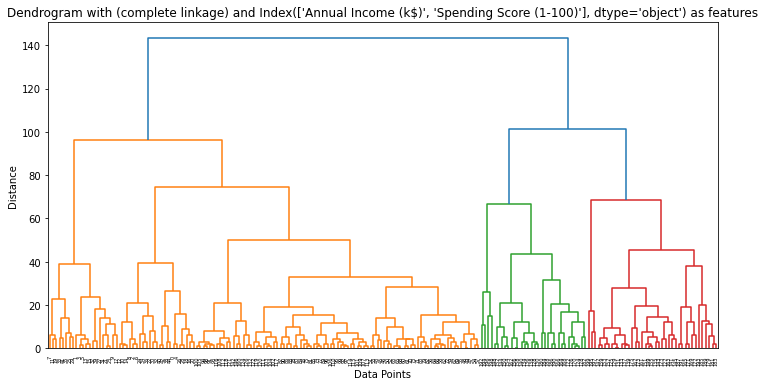

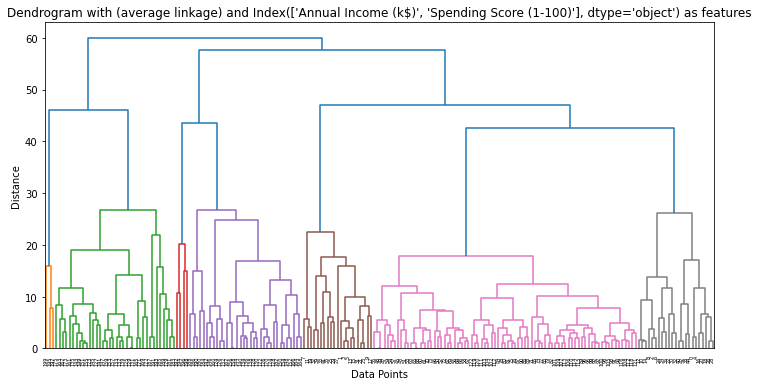

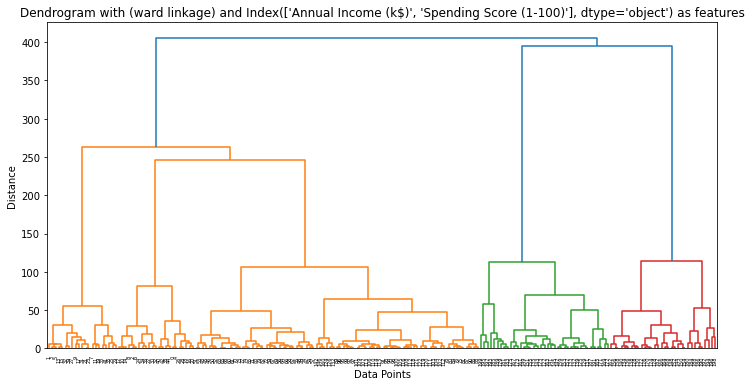

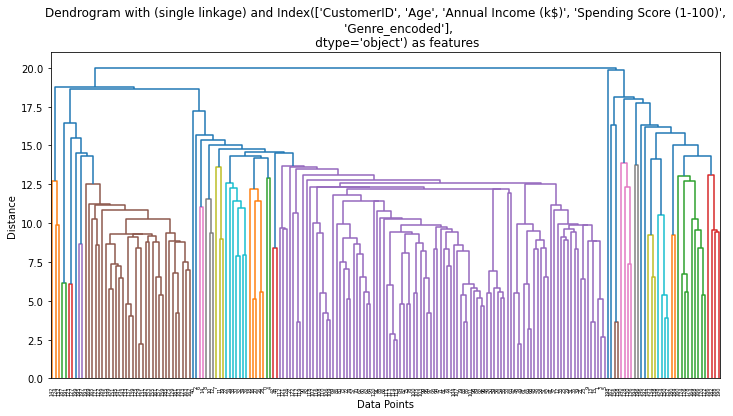

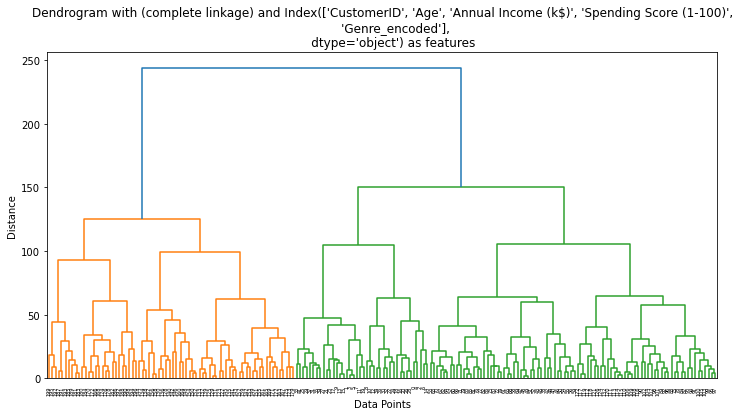

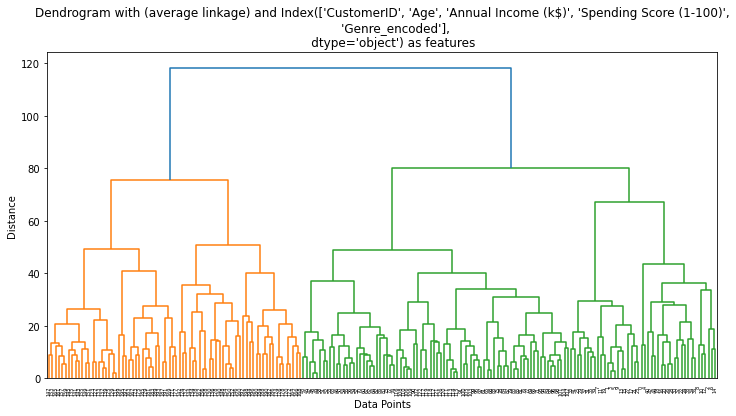

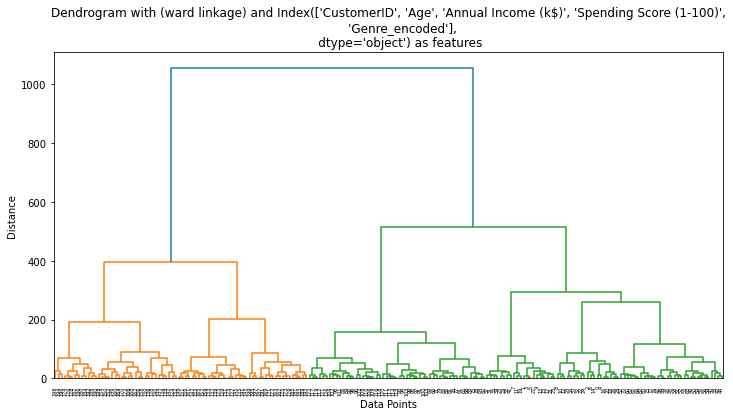

In [40]:
for i, features in enumerate(combination_of_features):
    hc = HierarchicalClustering(features)

    for linkage_type in linkage_methods:
        linkage_matrix = hc.compute_linkage(linkage_type)
        hc.plot_dendrogram(linkage_matrix, f"Dendrogram with ({linkage_type} linkage) and {features.columns} as features")

### Dataset 2: repeat the above method for gene expression dataset

In [47]:
data2 = pd.read_csv('SMAI-Dataset-gene-expression/gene.csv')

# Newfeature Combinations for gene expression data
new_data21 = data2[['GSM613412', 'GSM613413', 'GSM613414']]
new_data22 = data2[['GSM613415', 'GSM613416', 'GSM613417']]
new_data23 = data2[['GSM613418', 'GSM613419', 'GSM613420']]
new_data24 = data2[['GSM613421', 'GSM613422', 'GSM613423']]

feature_combinations = [new_data21, new_data22, new_data23, new_data24, data2]

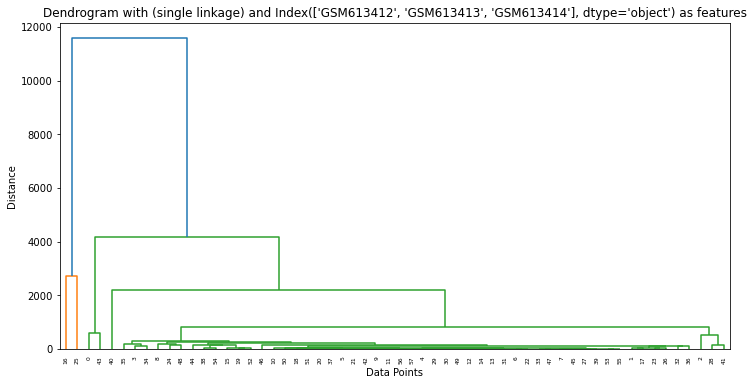

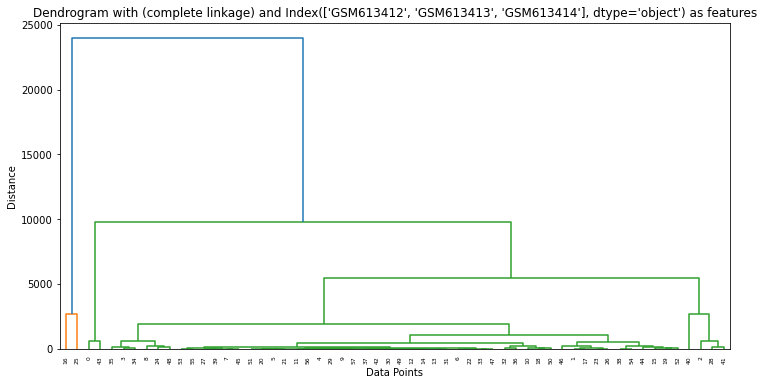

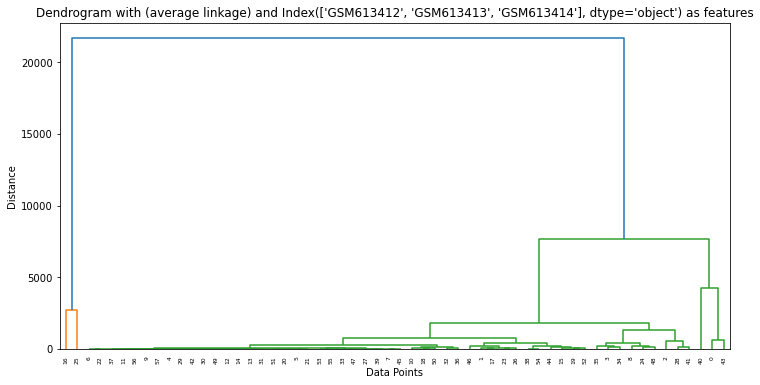

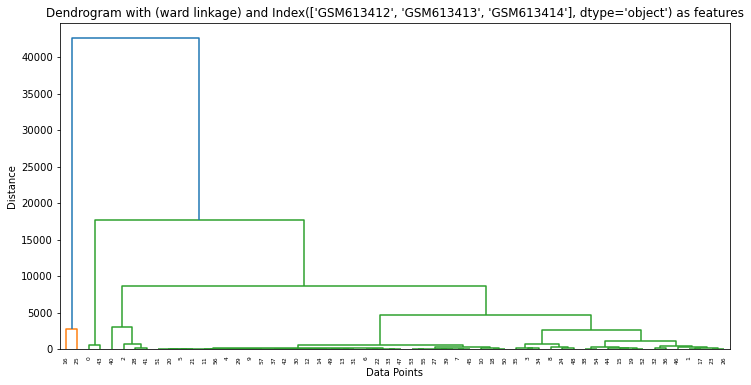

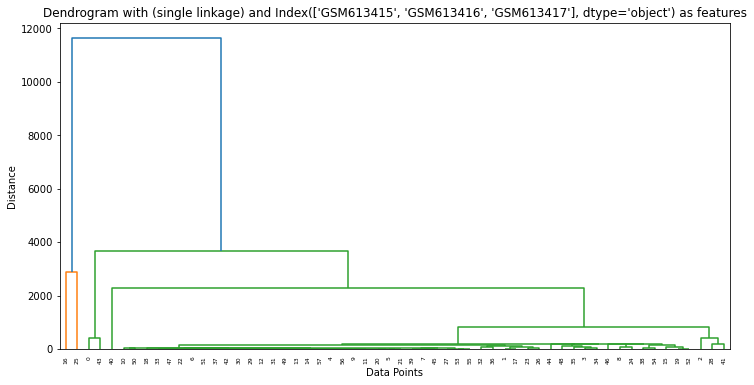

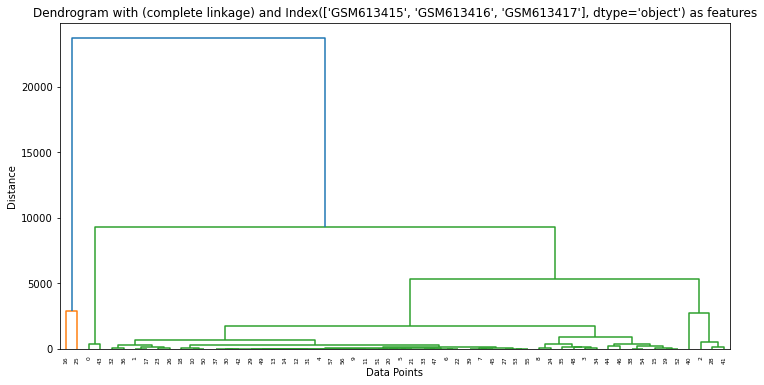

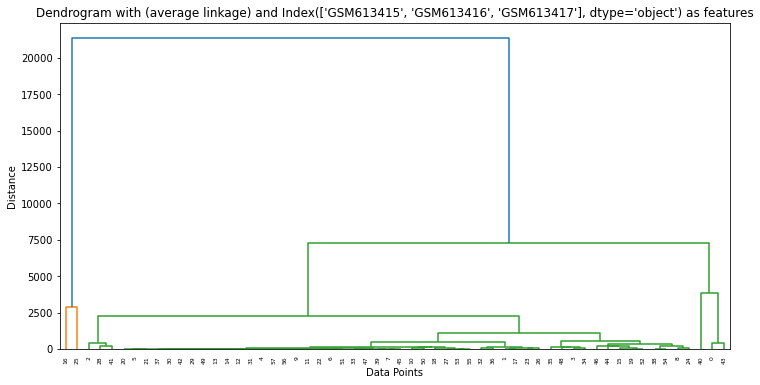

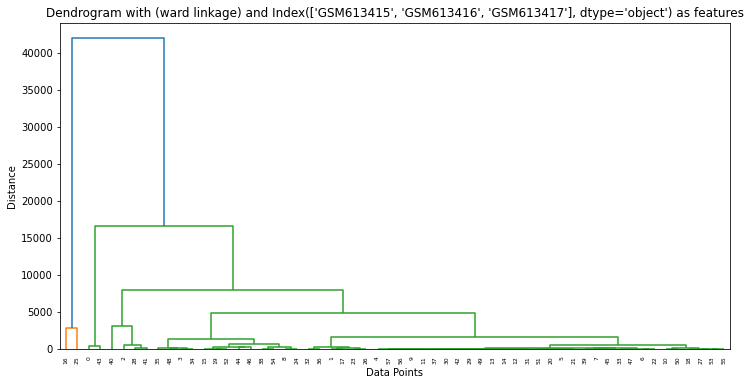

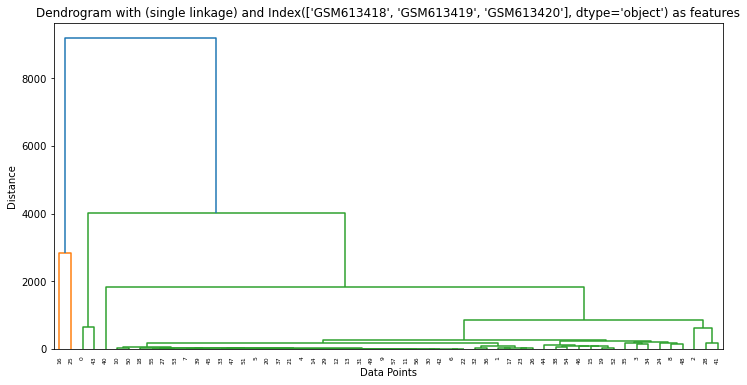

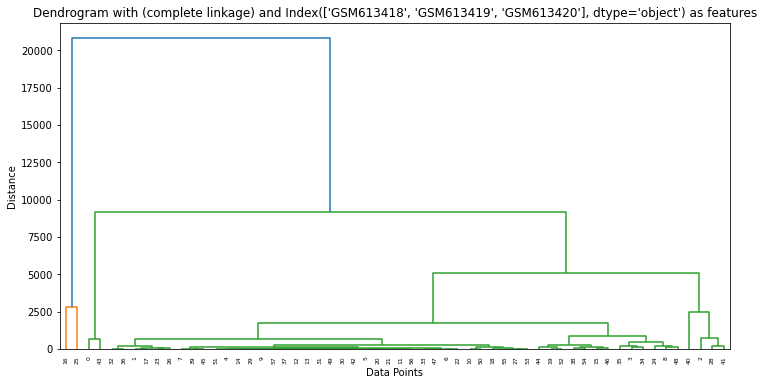

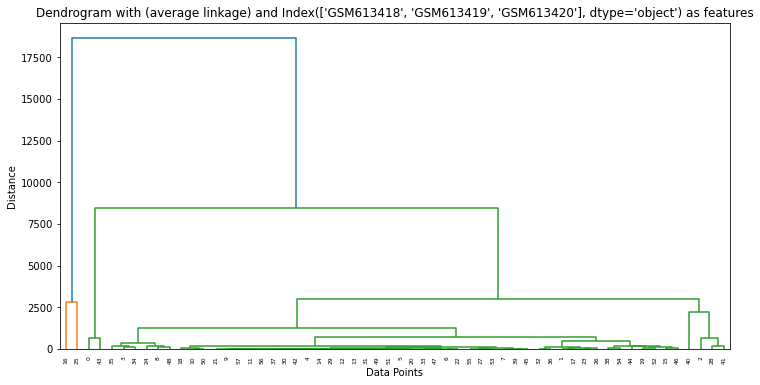

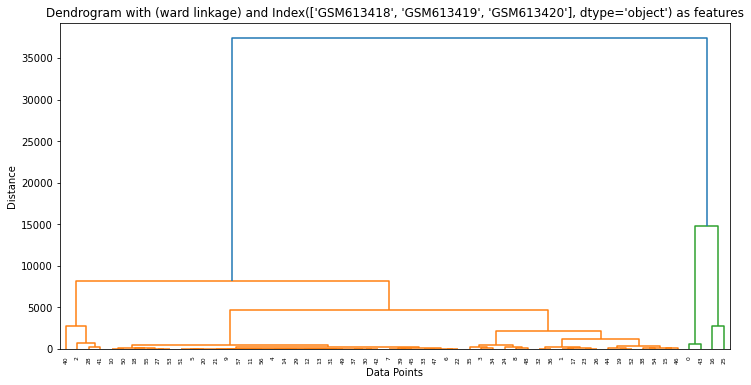

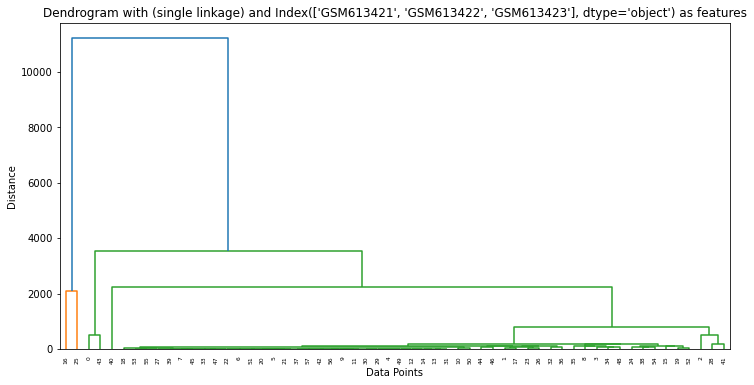

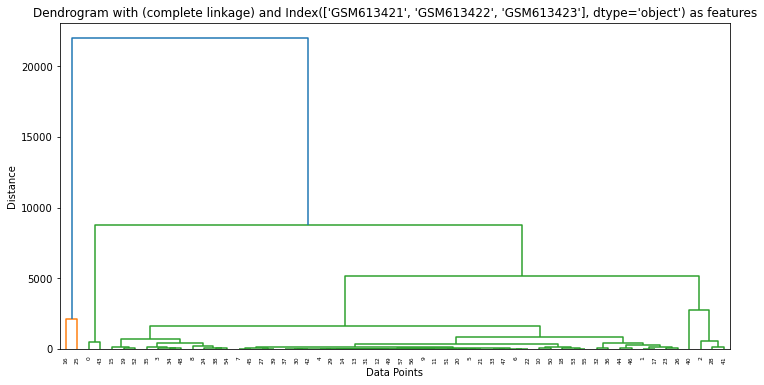

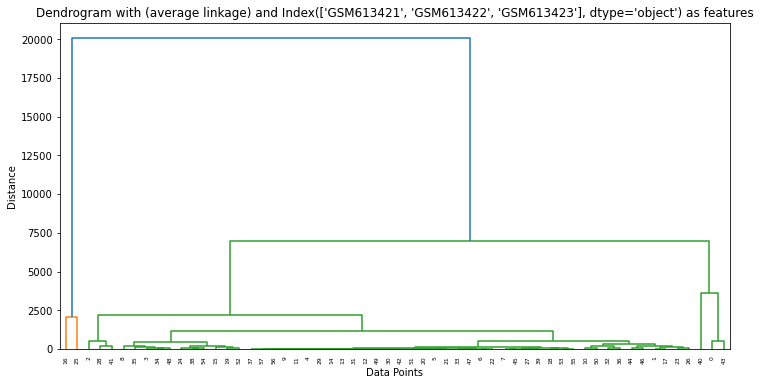

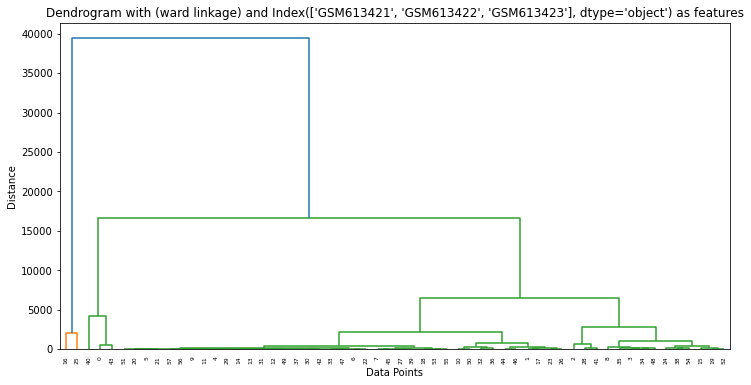

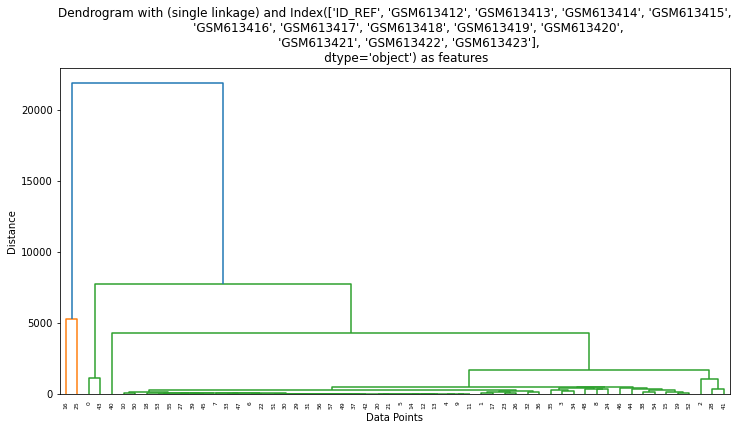

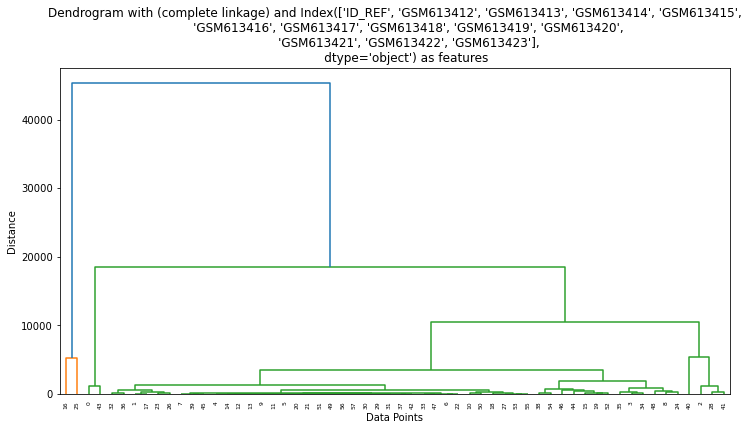

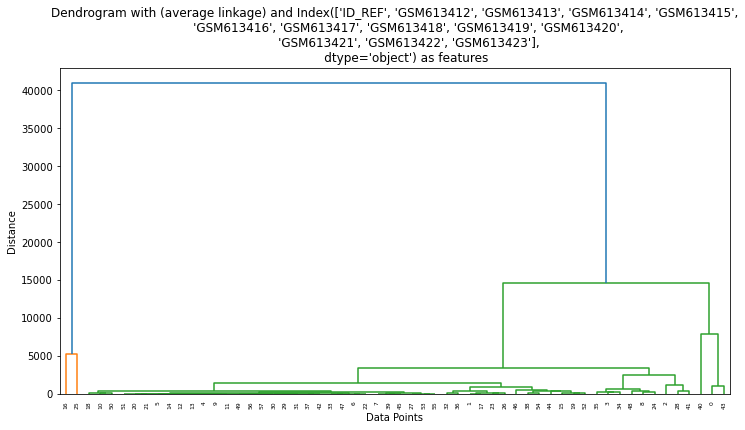

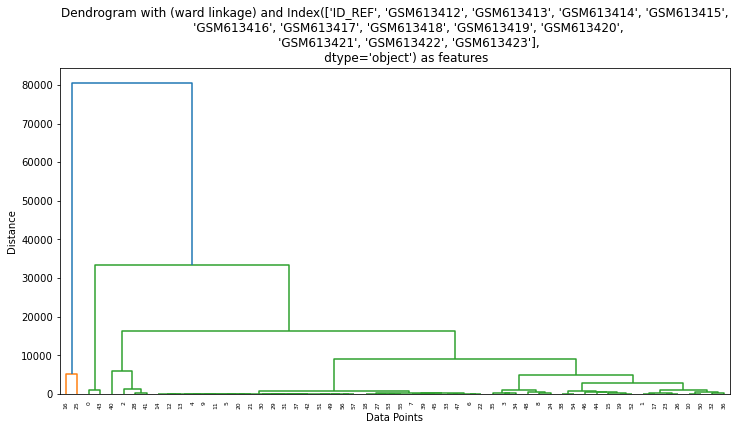

In [53]:
for i, features in enumerate(feature_combinations):
    hc = HierarchicalClustering(features)

    for linkage_type in linkage_methods:

        linkage_matrix = hc.compute_linkage(linkage_type)
        hc.plot_dendrogram(linkage_matrix, f"Dendrogram with ({linkage_type} linkage) and {features.columns} as features")